### ALL

In [76]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/all_features.csv')

In [78]:
df.head(5)

,url,protocol,num_queries,path_depth,suspicious_tld,length,entropy,fake_tld,brand,pop_keywords,similar,num_subdomains,asn,org,#queries,#apexes,subnet24
0,https://www.pronews.gr/ygeia/913333_emvolio-as...,https,0,3,0,14,0.368776,0,0,0,0,1,AS13335,CLOUDFLARENET,486280,1,104.27.123
1,https://linktr.ee/smartmedia%20https:/gigazine...,https,0,6,0,9,0.368463,0,0,0,0,0,AS54113,FASTLY,38144627,864,151.101.2
2,https://www.linkedin.com/,https,0,2,0,16,0.415977,0,0,0,1,1,AS8068,MICROSOFT-CORP-MSN-AS-BLOCK,2273869086,6,13.107.42
3,https://m.facebook.com/112639733519315/posts/3...,https,0,5,0,14,0.379894,0,1,0,1,1,AS32934,FACEBOOK,20087333,15,69.171.250
4,https://piemovies.cc/watch/sputnik-2020,https,0,3,1,12,0.385620,0,0,0,0,0,AS13335,CLOUDFLARENET,10511897,1150,104.24.123


In [79]:
df.shape

(406, 17)

In [80]:
df.columns

Index(['url', 'protocol', 'num_queries', 'path_depth', 'suspicious_tld',
       'length', 'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar',
       'num_subdomains', 'asn', 'org', '#queries', '#apexes', 'subnet24'],
      dtype='object')

In [81]:
cdf = df[['protocol', 'num_queries', 'path_depth', 'suspicious_tld',
       'length', 'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar',
       'num_subdomains', 'asn', 'org', '#queries', '#apexes', 'subnet24']]

In [82]:
cdf

,protocol,num_queries,path_depth,suspicious_tld,length,entropy,fake_tld,brand,pop_keywords,similar,num_subdomains,asn,org,#queries,#apexes,subnet24
0,https,0,3,0,14,0.368776,0,0,0,0,1,AS13335,CLOUDFLARENET,486280,1,104.27.123
1,https,0,6,0,9,0.368463,0,0,0,0,0,AS54113,FASTLY,38144627,864,151.101.2
2,https,0,2,0,16,0.415977,0,0,0,1,1,AS8068,MICROSOFT-CORP-MSN-AS-BLOCK,2273869086,6,13.107.42
3,https,0,5,0,14,0.379894,0,1,0,1,1,AS32934,FACEBOOK,20087333,15,69.171.250
4,https,0,3,1,12,0.385620,0,0,0,0,0,AS13335,CLOUDFLARENET,10511897,1150,104.24.123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,https,0,3,0,22,0.412487,0,0,0,0,0,AS8560,1&1 Ionos Se,1697685,1600,217.160.0
402,https,0,6,0,14,0.397751,0,0,0,0,0,AS24940,Hetzner Online GmbH,620,4,78.46.67
403,https,0,5,0,18,0.413534,0,0,0,0,1,AS63949,"Linode, LLC",1617918,2,45.79.163
404,https,0,3,0,22,0.469305,0,0,0,1,0,AS62729,ASMALLORANGE1,377135,223,143.95.80


In [83]:
cdf.dtypes

protocol           object
num_queries         int64
path_depth          int64
suspicious_tld      int64
length              int64
entropy           float64
fake_tld            int64
brand               int64
pop_keywords        int64
similar             int64
num_subdomains      int64
asn                object
org                object
#queries            int64
#apexes             int64
subnet24           object
dtype: object

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

cdf['protocol'] = label_encoder.fit_transform(cdf['protocol'])
cdf['entropy'] = label_encoder.fit_transform(cdf['entropy'])
cdf['asn'] = label_encoder.fit_transform(cdf['asn'])
cdf['org'] = label_encoder.fit_transform(cdf['org'])
cdf['subnet24'] = label_encoder.fit_transform(cdf['subnet24'])

In [85]:
cdf

,protocol,num_queries,path_depth,suspicious_tld,length,entropy,fake_tld,brand,pop_keywords,similar,num_subdomains,asn,org,#queries,#apexes,subnet24
0,1,0,3,0,14,23,0,0,0,0,1,2,16,486280,1,24
1,1,0,6,0,9,22,0,0,0,0,0,64,27,38144627,864,63
2,1,0,2,0,16,71,0,0,0,1,1,82,50,2273869086,6,49
3,1,0,5,0,14,30,0,1,0,1,1,46,26,20087333,15,191
4,1,0,3,1,12,34,0,0,0,0,0,2,16,10511897,1150,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,0,3,0,22,61,0,0,0,0,0,83,0,1697685,1600,141
402,1,0,6,0,14,47,0,0,0,0,0,30,35,620,4,196
403,1,0,5,0,18,63,0,0,0,0,1,75,48,1617918,2,166
404,1,0,3,0,22,142,0,0,0,1,0,73,10,377135,223,56


In [86]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [87]:
cdf

,num_queries,path_depth,suspicious_tld,length,entropy,fake_tld,brand,pop_keywords,similar,num_subdomains,asn,org,#queries,#apexes,subnet24
0,0.0,0.214286,0.0,0.388889,0.146497,0.0,0.0,0.0,0.0,0.333333,0.023529,0.188235,2.138558e-04,0.000203,0.114286
1,0.0,0.428571,0.0,0.250000,0.140127,0.0,0.0,0.0,0.0,0.000000,0.752941,0.317647,1.677521e-02,0.175503,0.300000
2,0.0,0.142857,0.0,0.444444,0.452229,0.0,0.0,0.0,1.0,0.333333,0.964706,0.588235,1.000000e+00,0.001219,0.233333
3,0.0,0.357143,0.0,0.388889,0.191083,0.0,1.0,0.0,1.0,0.333333,0.541176,0.305882,8.833988e-03,0.003047,0.909524
4,0.0,0.214286,1.0,0.333333,0.216561,0.0,0.0,0.0,0.0,0.000000,0.023529,0.188235,4.622912e-03,0.233597,0.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.0,0.214286,0.0,0.611111,0.388535,0.0,0.0,0.0,0.0,0.000000,0.976471,0.000000,7.466063e-04,0.325005,0.671429
402,0.0,0.428571,0.0,0.388889,0.299363,0.0,0.0,0.0,0.0,0.000000,0.352941,0.411765,2.726630e-07,0.000813,0.933333
403,0.0,0.357143,0.0,0.500000,0.401274,0.0,0.0,0.0,0.0,0.333333,0.882353,0.564706,7.115265e-04,0.000406,0.790476
404,0.0,0.214286,0.0,0.611111,0.904459,0.0,0.0,0.0,1.0,0.000000,0.858824,0.117647,1.658561e-04,0.045298,0.266667


In [88]:
cdf.isnull().sum()

num_queries       0
path_depth        0
suspicious_tld    0
length            0
entropy           0
fake_tld          0
brand             0
pop_keywords      0
similar           0
num_subdomains    0
asn               0
org               0
#queries          0
#apexes           0
subnet24          0
dtype: int64

### T_SNE

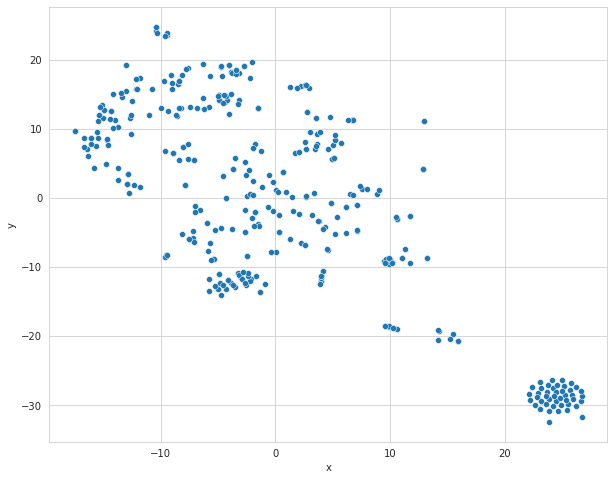

In [89]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# X_embedded = DBSCAN(eps=3,min_samples=2).fit_predict(cdf[['suspicious_tld', 'length',
#         'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching','ip','asn','org','#queries']])

# X_embedded = PCA(n_components=2).fit_transform(cdf[['suspicious_tld', 'length',
#        'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching']])

# X_embedded = TSNE(n_components=2,perplexity=3).fit_transform(cdf[['suspicious_tld', 'length',
#        'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching']])

# X_embedded = PCA(n_components=2).fit_transform(cdf)

X_embedded = TSNE(n_components=2,perplexity=30).fit_transform(cdf)


X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0],'y':x[1]},X_embedded)))

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_embedded,x='x',y='y',palette="deep")
# plt.plot(X_embedded)
plt.show()

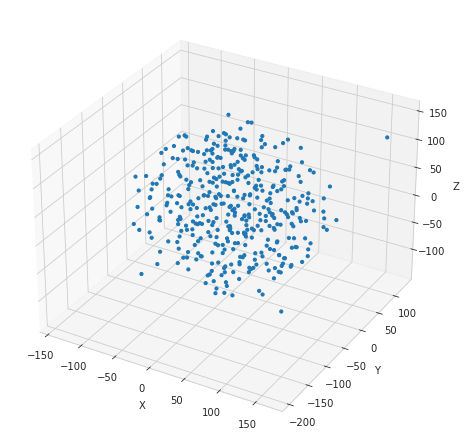

In [90]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3,perplexity=30).fit_transform(cdf)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0],'y':x[1], 'z':x[2]},X_embedded)))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="VT positives")
plt.show()

### PCA

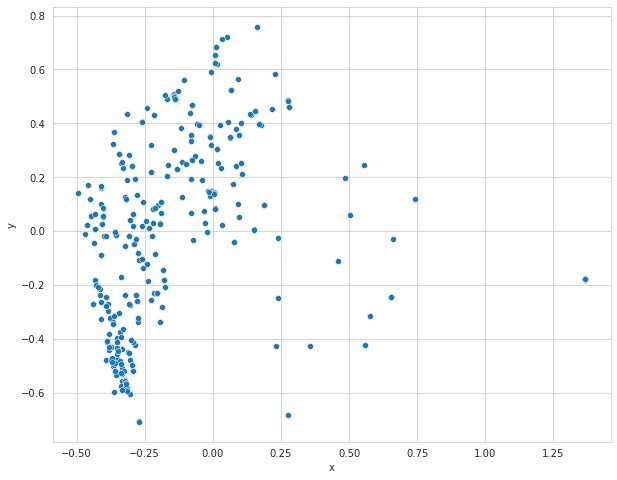

In [91]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN



X_embedded = PCA(n_components=2).fit_transform(cdf)
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0],'y':x[1]},X_embedded)))

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_embedded,x='x',y='y',palette="deep")
# plt.plot(X_embedded)
plt.show()

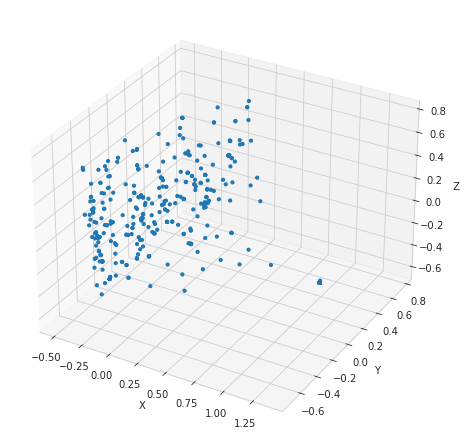

In [92]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = PCA(n_components=3).fit_transform(cdf)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0],'y':x[1], 'z':x[2]},X_embedded)))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="VT positives")
plt.show()

### DBSCAN

In [93]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


X_embedded = DBSCAN(eps=3,min_samples=2).fit_predict(cdf)

In [94]:
X_embedded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### DBSCAN Over T-SNE

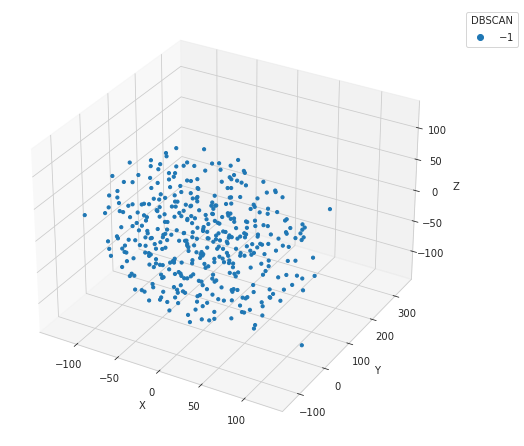

In [95]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3,perplexity=30).fit_transform(cdf)
clusters = DBSCAN(eps=3,min_samples=2).fit_predict(X_embedded)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1], 'z':x[0][2],'c':x[1]},zip(X_embedded,clusters))))


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.c, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="DBSCAN")
plt.show()

In [96]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

### DBSCAN Over PCA

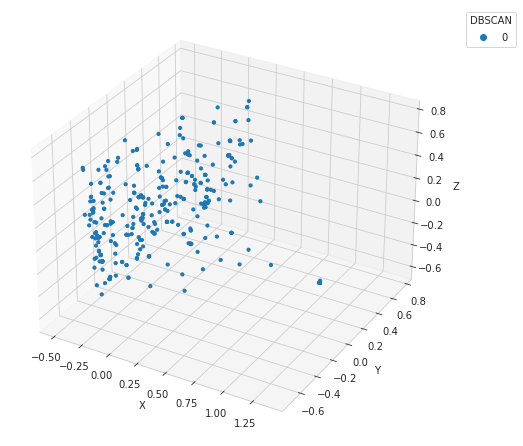

In [97]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = PCA(n_components=3).fit_transform(cdf)
clusters = DBSCAN(eps=3,min_samples=2).fit_predict(X_embedded)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1], 'z':x[0][2],'c':x[1]},zip(X_embedded,clusters))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.c, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="DBSCAN")
plt.show()

In [98]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### OPTICS Over T-SNE

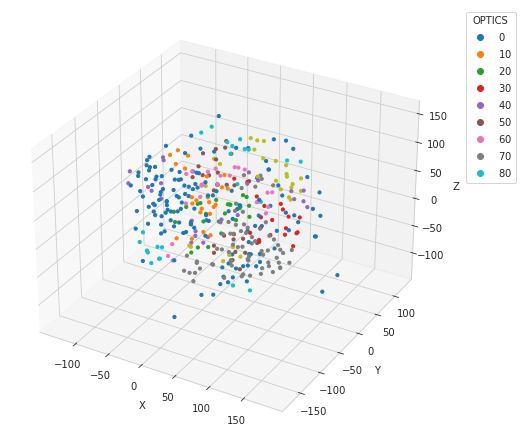

In [99]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS, cluster_optics_dbscan
sns.set_style("whitegrid")


from sklearn.manifold import TSNE

# X_embedded = PCA(n_components=3).fit_transform(cdf)
X_embedded = TSNE(n_components=3,perplexity=30).fit_transform(cdf)

clusters =  OPTICS(eps=3,min_samples=2).fit_predict(X_embedded)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1], 'z':x[0][2],'c':x[1]},zip(X_embedded,clusters))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.c, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="OPTICS")
plt.show()

In [100]:
clusters

array([-1, 55, -1, 71, 84, 61,  0, -1, 60, -1, 46, 61, 15, 67, 58, -1, 40,
       -1, 65, 65, 74, 47,  5, -1, 15, 83, 65, 54, -1, -1, 35,  2, 52, -1,
       65, 14, 57, -1, -1,  4, 78, 50, 49, -1,  7, 24, 45, -1, 44, -1, 85,
       65, 26, 37, 72, 39, 63, 36, -1, -1, -1,  8, 85, -1, -1, 65, 65, 31,
       71, 44, 79, 76, 14, 65, -1, 16, 69, -1, 77, -1, 45,  1, -1, 85, 34,
       -1, 78, -1,  4, 24, 60,  6, -1, 65, -1, -1, 43, 76, 54, -1, -1, 69,
       20,  5, 65, 76, -1, -1, 65, 21, -1, 71, 76, 47, 59, 76, 82, 42, -1,
       65, -1, 65, 63, -1, 39,  3, -1,  9, 75,  5, -1, 65, 72, 65, -1, -1,
       -1, 65, 66, 13, 59, -1, 88, 65, 87, -1, 12, -1, 65, 18, 65, 25, 84,
       -1, 22, -1, -1, 43, 62, 30, 69, 62, 20, 78, -1, -1, 69,  8, 51, -1,
       63, 28, -1, 52, 70, -1, 54, -1, 25, -1, -1, 30,  0, 34, 33, -1, -1,
       65, 83, -1, -1, 88, 65, -1, 79, -1, 82, -1, -1, 70, -1, -1, -1, 29,
       -1, 21, 81, -1,  8, 22, 33, -1, -1, 34, -1,  7, -1, -1, 65, 77, -1,
       53, 65, 47, 40, 57

### OPTICS Over PCA

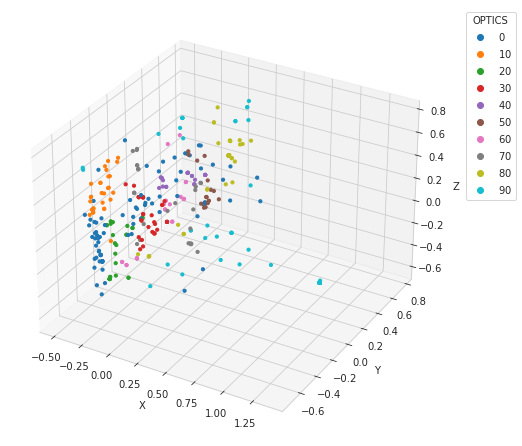

In [101]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS, cluster_optics_dbscan
sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = PCA(n_components=3).fit_transform(cdf)

clusters =  OPTICS(eps=3,min_samples=2).fit_predict(X_embedded)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1], 'z':x[0][2],'c':x[1]},zip(X_embedded,clusters))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.c, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="OPTICS")
plt.show()

In [102]:
clusters

array([ 0, 72, 95, 92, -1, -1,  1, 63, -1, -1, -1, -1, -1, 51, 26, -1, 63,
       30, 95, 95, 28, 71, 17, 19, -1, 87, 95, 72, 13, 72, 84,  5, 37,  2,
       95, 40, 25, -1, -1, 19, 81, 52, 54, 34,  3, -1, 88, 33, 87, 58, 41,
       95, 74, 12, 91, 90, 94, 15, -1, 54, -1, 11, 18, 14, 95, 95, 95, 49,
       -1, 50, 41, 78, 33, 95,  3, -1, 83, 56, 43, 33, 88, 60, 68, -1, 51,
       36, 81, 27, 19, 44, -1,  9, -1, 95, -1, 16, 76, 78, 72, 93,  7, 83,
       38, 13, 95, 78, 53, 53, 95, 73, 54, 94, 78, 71, 59, 78, 31, 65, 29,
       95, 48, 95, 94, 34, 90,  5, 81, -1, 42, 16, -1, 95, 91, 95, 40, 70,
       -1, 95, 46, 32, 59, 64, 95, 95, 75, 37, 74, 14, 95, 68, 95, 47, 21,
       18, 82, 70, -1, 76, 86, 85, 83, 86, 38, 81, 17, 35, 83,  9, 89, 88,
       94, 80, -1, 35, 67, 66, 84,  1, -1, 20, 56, 85,  2, 52, 51,  7, 61,
       95, 43, 57,  0, 95, 95, -1, 67, -1, 31, 62,  4, 24, 21, 18,  4, -1,
       64, -1, 20, 11,  8, 82, 51, 69, -1, 77,  8,  3, 53, 92, 95, 50, 32,
       23, 95, 71, 39, 25

In [120]:
DATA = pd.DataFrame({'url':df.url,'cluster':X_embedded.c})

In [121]:
DATA

,url,cluster
0,https://www.pronews.gr/ygeia/913333_emvolio-as...,0
1,https://linktr.ee/smartmedia%20https:/gigazine...,72
2,https://www.linkedin.com/,95
3,https://m.facebook.com/112639733519315/posts/3...,92
4,https://piemovies.cc/watch/sputnik-2020,-1
...,...,...
401,https://consensodelmercado.com/bolsas-internac...,51
402,https://prismaradio.gr/2020/09/09/astrazeneca-...,64
403,https://www.lostiempos.com/actualidad/mundo/20...,78
404,https://covid19globalcases.com/vacuna-de-rusia...,94


In [126]:
open('/bad_ip_data/ucsc/Vaccine_Disinfo/data/orange.txt','w').write('\n'.join(list(DATA.loc[DATA.cluster<=10].url)))

9475

In [130]:
open('/bad_ip_data/ucsc/Vaccine_Disinfo/data/red.txt','w').write('\n'.join(list(DATA.loc[20<DATA.cluster].loc[DATA.cluster<=30].url)))

2721